<a href="https://colab.research.google.com/github/Linameji88/miSitio/blob/main/juegoDeLaVida.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Definir la función de actualización

Esta función calculará el siguiente estado de la cuadrícula de acuerdo con las reglas del Juego de la Vida:

Regla 1: Una célula viva con menos de 2 vecinos vivos muere (subpoblación).
Regla 2: Una célula viva con 2 o 3 vecinos vivos sobrevive.
Regla 3: Una célula viva con más de 3 vecinos vivos muere (sobrepoblación).
Regla 4: Una célula muerta con exactamente 3 vecinos vivos se vuelve viva (reproducción).
Usaremos desplazamientos (con np.roll) para contar a los vecinos, considerando condiciones periódicas (bordes conectados).

2. Configurar la simulación

Establece el tamaño de la cuadrícula (200x200), el número de pasos de tiempo (200)

3. Ejecutar la simulación para cada densidad

Para cada densidad inicial:

Generamos la cuadrícula inicial aleatoria, donde cada celda es viva (1) con probabilidad igual a la densidad y muerta (0) en caso contrario.
Simulamos la evolución durante 200 pasos de tiempo.
Calculamos la densidad final de células vivas y la almacenamos.

4. Graficar la relación entre densidad inicial y densidad final

Utilizaremos Matplotlib para visualizar cómo varía la densidad final de células vivas en función de la densidad inicial.

Explicación:
Este gráfico te permitirá observar cómo, dependiendo de la densidad con la que se inicia el sistema, el estado final varía después de 200 pasos. Es posible notar que a densidades muy bajas el sistema tiende a extinguirse, mientras que a densidades altas puede estabilizarse en un patrón oscilatorio o alcanzar un equilibrio diferente.

5. Breve análisis de los resultados

Densidades bajas:
Cuando la densidad inicial es baja, hay pocas células vivas, lo que puede llevar rápidamente a la extinción del sistema debido a la falta de vecinos que favorezcan la reproducción.
Densidades intermedias:
En este rango, es posible observar una dinámica más rica donde algunos patrones pueden estabilizarse, mientras otros desaparecen. La densidad final puede ser inferior a la inicial, reflejando la eliminación de células por subpoblación o sobrepoblación.
Densidades altas:
Aunque la alta densidad inicial provee muchas células, la sobrepoblación puede provocar que muchas mueran por exceso de vecinos, llevando a un equilibrio con una densidad final menor que la inicial.
Observación:
Dado que la simulación utiliza condiciones aleatorias para la inicialización, los resultados pueden variar en cada ejecución. Se recomienda ejecutar la simulación varias veces para obtener una tendencia más robusta y analizar el comportamiento promedio.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

# Configurar la salida de animación en HTML5
plt.rc('animation', html='html5')

# Función para inicializar la cuadrícula con valores aleatorios (0 o 1)
def init():
    return np.random.randint(0, 2, (200, 200))

# Función que aplica las reglas del Juego de la Vida
def apply_rules(C):
    # Crear una copia de la cuadrícula
    new_C = np.zeros_like(C)

    # Definir los desplazamientos para los vecinos (vecindad de Moore)
    neighbors = [(-1, -1), (-1, 0), (-1, 1),
                 (0, -1),         (0, 1),
                 (1, -1), (1, 0), (1, 1)]

    # Iterar sobre cada celda
    for i in range(C.shape[0]):
        for j in range(C.shape[1]):
            # Contar vecinos vivos
            live_neighbors = sum(C[(i + di) % C.shape[0], (j + dj) % C.shape[1]] for di, dj in neighbors)

            # Aplicar reglas
            if C[i, j] == 1:
                # Supervivencia: una célula viva sobrevive si tiene 2 o 3 vecinos vivos
                if live_neighbors in [2, 3]:
                    new_C[i, j] = 1
            else:
                # Nacimiento: una célula muerta revive si tiene exactamente 3 vecinos vivos
                if live_neighbors == 3:
                    new_C[i, j] = 1

    return new_C

# Función para generar los estados del juego (200 pasos)
def game(C, steps):
    states = [C]
    densities = [np.sum(C) / (200 * 200)]  # Guardar densidad inicial

    for _ in range(steps):
        C = apply_rules(C)  # Aplicar reglas en cada paso
        states.append(C)
        densities.append(np.sum(C) / (200 * 200))  # Guardar densidad en cada paso

    return states, densities

# Inicializar la cuadrícula
C = init()
Cs, densities = game(C, 200)

# Crear la figura para la animación
fig, ax = plt.subplots(figsize=(6, 6))

# Función de actualización para la animación
def update(i):
    ax.clear()
    ax.imshow(Cs[i], cmap="gray_r")
    ax.axis('off')
    ax.set_title(f"Paso {i+1}/{len(Cs)}")

# Crear la animación
anim = animation.FuncAnimation(fig, update, frames=len(Cs), interval=100, repeat=False)

# Cierra la ventana al terminar la animación
plt.close()
display(anim)  # Mostrar animación


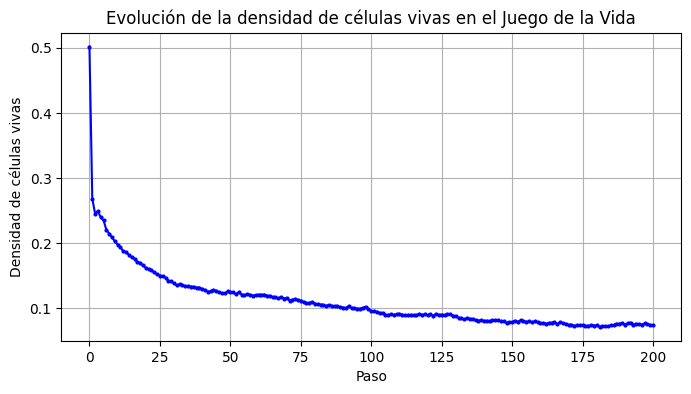

In [ ]:
plt.figure(figsize=(8, 4))
plt.plot(range(len(densities)), densities, marker='o', linestyle='-', color='b', markersize=2)
plt.xlabel("Paso")
plt.ylabel("Densidad de células vivas")
plt.title("Evolución de la densidad de células vivas en el Juego de la Vida")
plt.grid()
plt.show()